In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotFigure(df, xmin = 0, xmax = 90, ymin = -10, ymax = 50, title = '', file_name = '', save=False):
    plt.figure(figsize = (10,6))
    
    for page, _df in df.groupby('Page'):
        plt.plot(_df['Time (ms)'], _df['Transducer Output (mV)'], 'b-', linewidth=1)
        
    plt.title(title)
    plt.xlabel("Time (ms)")
    plt.ylabel("Transducer Output (mV)")
    plt.xlim(xmin = xmin, xmax = xmax)
    plt.ylim(ymin = ymin, ymax = ymax)
    if save:
        plt.savefig('Desktop/Data_Adrienne/Skeletal Muscle Figures/' + file_name + '.jpg', format='jpg', dpi=500)
    else:
        plt.show()

    
def adjustValues(df):
    df.columns = ['Time (ms)', 'Page', 'Transducer Output (mV)']
    df['Transducer Output (mV)'] = df['Transducer Output (mV)'] * 1000
    return df

def adjustOutput(df):
    df['Transducer Output (mV)'] = df['Transducer Output (mV)'] * 1000
    
def adjustTime(df):
    df['Time (ms)'] = df['Time (ms)'] * 1000
    
skeletalPath = 'Desktop/Data_Adrienne/Skeletal Muscle Figures/'
readPath = 'Desktop/Data_Adrienne/Skeletal Muscle Data/'

# Calibration

In [3]:
calibration = pd.read_csv('Desktop/Data_Adrienne/Skeletal Muscle Data/Calibration of Isometric Transducer.txt', sep='\t',
                     header = None)
calibration = calibration.dropna(how = 'all', axis = 1)
calibration.columns = ['Time (s)', 'Page', 'Transducer Output (mV)']
calibration.head()
adjustOutput(calibration)

In [4]:
calibration.describe()

,Time (s),Page,Transducer Output (mV)
count,2560.000000,2560.0,2560.000000
mean,31.987500,1.0,6.577275
std,18.478817,0.0,18.882382
min,0.000000,1.0,-23.350000
25%,15.993750,1.0,-4.731250
50%,31.987500,1.0,0.000000
75%,47.981250,1.0,24.781250
max,63.975000,1.0,51.175000


### Raw data for calibration creation

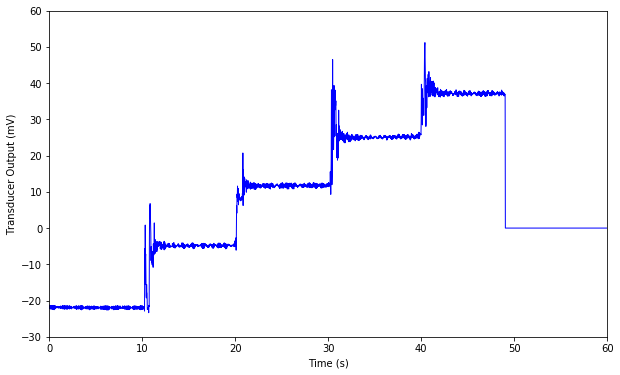

In [5]:
plt.figure(figsize = (10,6))
plt.plot(calibration['Time (s)'], calibration['Transducer Output (mV)'], 'b-', linewidth=1)
plt.title("")
plt.xlabel('Time (s)')
plt.ylabel('Transducer Output (mV)')
plt.xlim(xmin = 0, xmax = 60)
plt.ylim(ymin = -30, ymax = 60)
plt.savefig('Desktop/Data_Adrienne/Skeletal Muscle Figures/skeletalCalibration.jpg', format = 'jpg', dpi = 750)

In [6]:
# Find transducer outputs for given time steps
output = calibration[calibration['Time (s)'].isin([5, 15, 25, 35, 45])][['Transducer Output (mV)']]

output['Weight (g)'] = [10, 20, 30, 40, 50]

output.to_csv('skeletalCalibration.csv')

output

,Transducer Output (mV),Weight (g)
200,-22.050,10
600,-4.900,20
1000,11.750,30
1400,25.075,40
1800,37.275,50


### Calibration Curve

In [7]:
m, b = np.polyfit(output['Transducer Output (mV)'], output['Weight (g)'], 1)
print(m, b)

0.6689300393695429 23.69198972874521


# Length Tension Relationship

In [46]:
lengthTension = pd.read_csv('Desktop/Data_Adrienne/Skeletal Muscle Data/Length-Tension Relationship.txt',
                            sep='\t', header = None)
lengthTension = lengthTension.dropna(how = 'all', axis = 1)
adjustValues(lengthTension)
adjustTime(lengthTension)
lengthTension.describe()

,Time (ms),Page,Transducer Output (mV)
count,17920.000000,17920.000000,17920.000000
mean,63.975000,4.000000,-11.983733
std,36.951445,2.000056,29.540155
min,0.000000,1.000000,-51.500000
25%,31.987500,2.000000,-36.250000
50%,63.975000,4.000000,-19.500000
75%,95.962500,6.000000,2.000000
max,127.950000,7.000000,66.250000


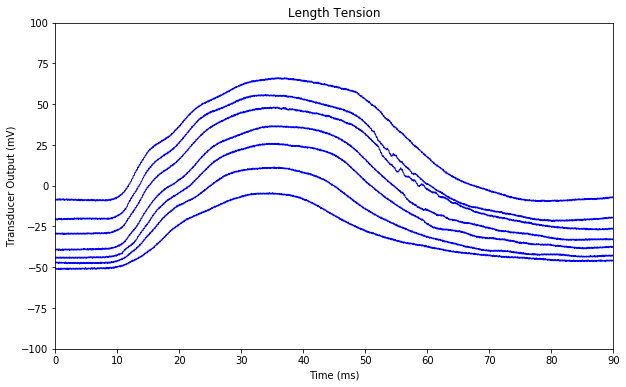

In [47]:
plotFigure(lengthTension, 0, 90, -100, 100, 'Length Tension', file_name = 'skeletalLengthTension', save = True)

In [48]:
# Create Tension column by multiplying transducer output by calibration slope
lengthTension['Tension (g)'] = lengthTension['Transducer Output (mV)']*m
lengthTension.head()

,Time (ms),Page,Transducer Output (mV),Tension (g)
0,0.00,1,-50.75,-33.948199
1,0.05,1,-50.50,-33.780967
2,0.10,1,-50.75,-33.948199
3,0.15,1,-51.25,-34.282665
4,0.20,1,-51.25,-34.282665


In [51]:
lengthTension[lengthTension['Page'] == 1].describe()

,Time (ms),Page,Transducer Output (mV),Tension (g)
count,2560.000000,2560.0,2560.000000,2560.000000
mean,63.975000,1.0,-36.435449,-24.372766
std,36.957633,0.0,14.399229,9.632077
min,0.000000,1.0,-51.500000,-34.449897
25%,31.987500,1.0,-46.250000,-30.938014
50%,63.975000,1.0,-44.750000,-29.934619
75%,95.962500,1.0,-28.437500,-19.022698
max,127.950000,1.0,-4.250000,-2.842953


In [52]:
-2.842953 - -34.449897

31.606944

### Plotting a single page of contraction data with Transducer Output (mV) on the y-axis 

In [11]:
# Get values for first page to find where to set x and y axis values
lengthTension[lengthTension['Page'] == 1].describe()

,Time (ms),Page,Transducer Output (mV),Tension (g)
count,2560.000000,2560.0,2560.000000,2560.000000
mean,0.063975,1.0,-36.435449,-24.372766
std,0.036958,0.0,14.399229,9.632077
min,0.000000,1.0,-51.500000,-34.449897
25%,0.031988,1.0,-46.250000,-30.938014
50%,0.063975,1.0,-44.750000,-29.934619
75%,0.095963,1.0,-28.437500,-19.022698
max,0.127950,1.0,-4.250000,-2.842953


In [12]:
#Set these axes limits
kwargs = {'xmax': 80, 'ymin': -75, 'ymax': 50}

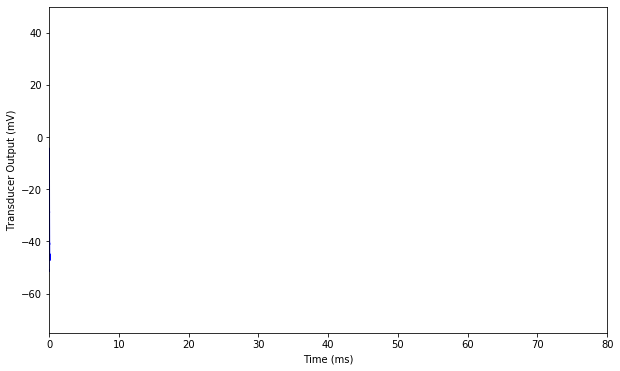

In [13]:
#Plotting raw data for the first page of the lengthTension dataframe
plotFigure(lengthTension[lengthTension['Page'].isin([1])], **kwargs, save = True, file_name = 'skeletalLengthTension1')

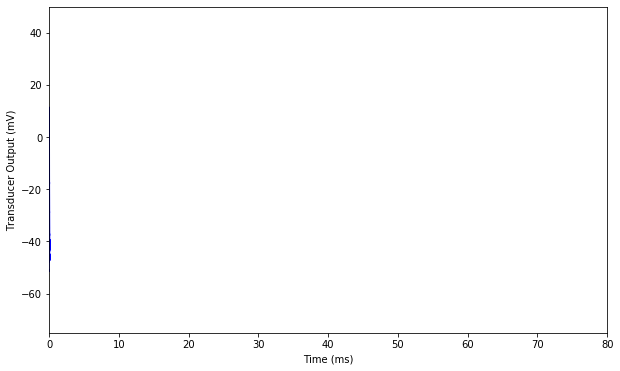

In [14]:
plotFigure(lengthTension[lengthTension['Page'].isin([1, 2])], **kwargs, save = True, file_name = 'skeletalLengthTension2')

In [15]:
lengthTension.Page.unique()

array([1, 2, 3, 4, 5, 6, 7])

In [16]:
lengthTensionPages = []
for i in range(1, 8):
    lengthTensionPages.append(lengthTension[lengthTension['Page'] == i])

In [17]:
lengthTensionPages[2]

,Time (ms),Page,Transducer Output (mV),Tension (g)
5120,0.00000,3,-44.50,-29.767387
5121,0.00005,3,-44.25,-29.600154
5122,0.00010,3,-43.75,-29.265689
5123,0.00015,3,-43.75,-29.265689
5124,0.00020,3,-44.50,-29.767387
...,...,...,...,...
7675,0.12775,3,-40.00,-26.757202
7676,0.12780,3,-39.75,-26.589969
7677,0.12785,3,-39.25,-26.255504
7678,0.12790,3,-39.00,-26.088272


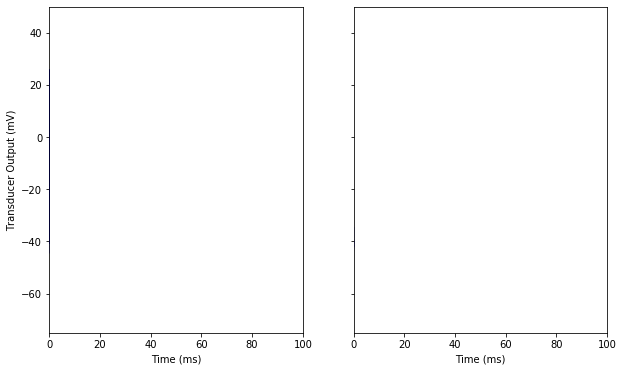

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (10,6), sharex=True, sharey=True)
t = [(2,1), (2,0)]
for j in range(len(t)):
    pgs = t[j]
    for i in range(pgs[0], pgs[1], -1): 
        page_df = lengthTensionPages[i]
        ax[j].plot(page_df['Time (ms)'], page_df['Transducer Output (mV)'], 'b-', linewidth = 0.5)
    
ax[0].set_ylabel('Transducer Output (mV)')
ax[0].set_xlim(xmin = 0, xmax = 100)
ax[0].set_ylim(ymin = -75, ymax = 50)
for a in ax:
    a.set_xlabel('Time (ms)')
plt.savefig(skeletalPath + 'skeletal_hw.jpg', dpi = 500)

# Recruitment

In [19]:
recruitment = pd.read_csv('Desktop/Data_Adrienne/Skeletal Muscle Data/Muscle Recruit.txt', sep='\t', header = None)
recruitment = recruitment.dropna(how = 'all', axis = 1)
adjustValues(recruitment)
adjustTime(recruitment)

### More Mati magic

In [20]:
recruitmentPages = []
for i in range(1,9):
    recruitmentPages.append(recruitment[recruitment['Page'] == i])

In [21]:
### Other method of plotting full DataFrame
#for page in recruitmentPages:
    #plt.plot(page['Time (ms)'], page['Transducer Output (mV)'], linewidth=0.5)

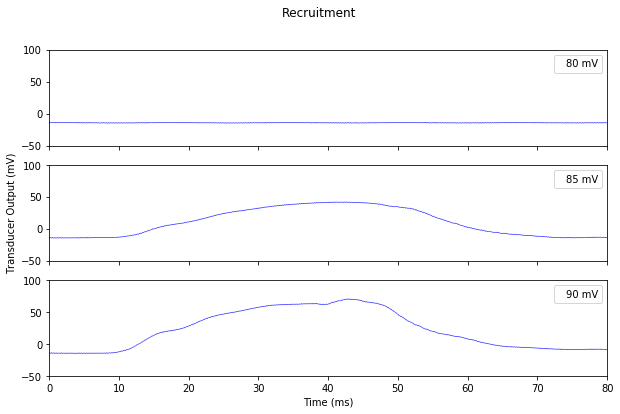

In [22]:
fig, ax = plt.subplots(3, 1, figsize = (10, 6), sharex= True, sharey= True)
j=0
i=0
for i in range(3):
    ax[j].plot(recruitmentPages[i]['Time (ms)'], recruitmentPages[i]['Transducer Output (mV)'], 'b-', linewidth=0.5)
    j = j+1
plt.suptitle("Recruitment")
plt.xlabel('Time (ms)')
ax[1].set_ylabel('Transducer Output (mV)')
ax[0].legend(labels=['80 mV'], handlelength=0)
ax[1].legend(labels=['85 mV'], handlelength=0)
ax[2].legend(labels=['90 mV'], handlelength=0)
plt.xlim(xmin = 0, xmax = 80)
plt.ylim(ymin = -50, ymax = 100)
plt.savefig(skeletalPath + 'skeletalRecruitment.jpg', format = 'jpg', dpi = 500)

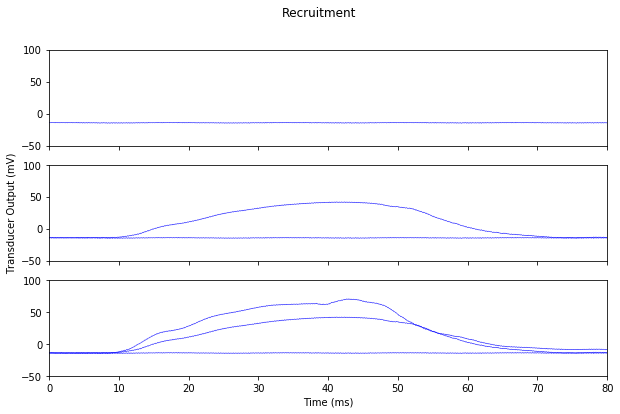

In [23]:
fig, ax = plt.subplots(3, 1, figsize = (10, 6), sharex= True, sharey= True)
for i in range(1):
    page = recruitmentPages[i]
    ax[0].plot(page['Time (ms)'], page['Transducer Output (mV)'], 'b-', linewidth=0.5)
for i in range(2):
    page = recruitmentPages[i]
    ax[1].plot(page['Time (ms)'], page['Transducer Output (mV)'], 'b-', linewidth=0.5)
for i in range(3):
    page = recruitmentPages[i]
    ax[2].plot(page['Time (ms)'], page['Transducer Output (mV)'], 'b-', linewidth=0.5)
plt.suptitle("Recruitment")
plt.xlabel('Time (ms)')
ax[1].set_ylabel('Transducer Output (mV)')
plt.xlim(xmin = 0, xmax = 80)
plt.ylim(ymin = -50, ymax = 100)
plt.savefig(skeletalPath + 'skeletalRecruitment.jpg', format = 'jpg', dpi = 500)

In [24]:
args = {'format': 'jpg', 'dpi': 500}

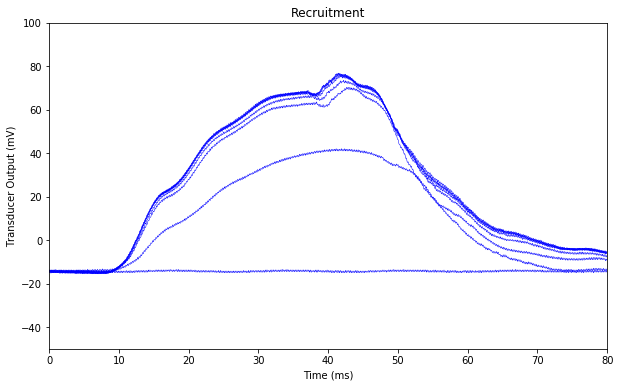

In [25]:
plt.figure(figsize = (10,6))
for page, _df in recruitment.groupby('Page'):
    plt.plot(_df['Time (ms)'], _df['Transducer Output (mV)'], 'b-', linewidth=0.5)
plt.title('Recruitment')
plt.xlabel('Time (ms)')
plt.ylabel('Transducer Output (mV)')
plt.xlim(xmin=0, xmax=80)
plt.ylim(ymin=-50, ymax=100)
plt.savefig(skeletalPath + 'skeletalRecruitmentMax.jpg', dpi = 500)

# Summation of Stimuli

In [26]:
summation = pd.read_csv('Desktop/Data_Adrienne/Skeletal Muscle Data/Summation Stim.txt', sep='\t', header = None)
summation = summation.dropna(how = 'all', axis = 1)
adjustValues(summation)

,Time (ms),Page,Transducer Output (mV)
0,0.000,1,-5.75
1,0.005,1,-5.75
2,0.010,1,-5.75
3,0.015,1,-6.00
4,0.020,1,-6.50
...,...,...,...
20475,63.875,8,0.00
20476,63.900,8,0.00
20477,63.925,8,0.00
20478,63.950,8,0.00


In [27]:
def pltSummation(page, xmax, ymax, title = '', file_name = '', save = False):
    plt.figure(figsize = (10,6))
    plt.plot(page['Time (ms)'], page['Transducer Output (mV)'], 'b-', linewidth=0.5)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Transducer Output (mV)')
    plt.xlim(xmin = 0, xmax = xmax)
    plt.ylim(ymin = -20, ymax = ymax)
    if save:
        plt.savefig('Desktop/Data_Adrienne/Skeletal Muscle Figures/' + file_name, dpi = 500)
    else:
        plt.show()

In [28]:
kwargs = {'xmax': 7, 'ymax': 100, 'title': '1 Hz', 'file_name': 'skeletal1Hz.jpg'}

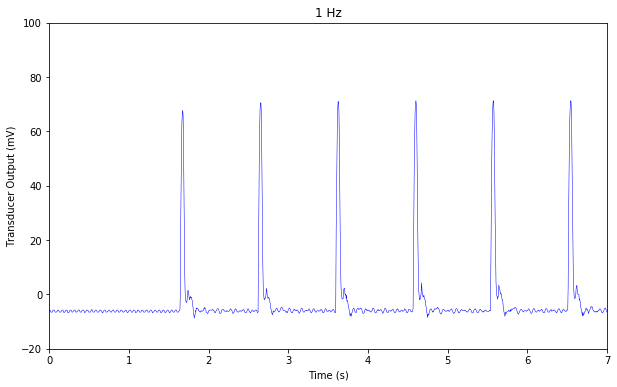

In [29]:
pltSummation(summation[summation['Page'] == 1], **kwargs, save = True)

In [30]:
kwargs = {'xmax': 7, 'ymax': 100, 'title': '2 Hz', 'file_name': 'skeletal2Hz.jpg'}

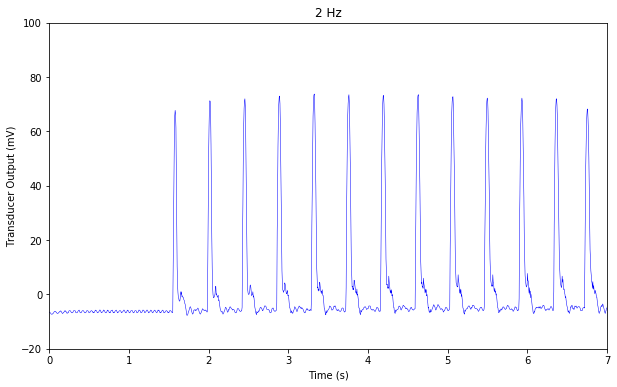

In [31]:
pltSummation(summation[summation['Page'] == 2], **kwargs, save = True)

In [32]:
kwargs = {'xmax': 10, 'ymax': 100, 'title': '5 Hz', 'file_name': 'skeletal5Hz.jpg'}

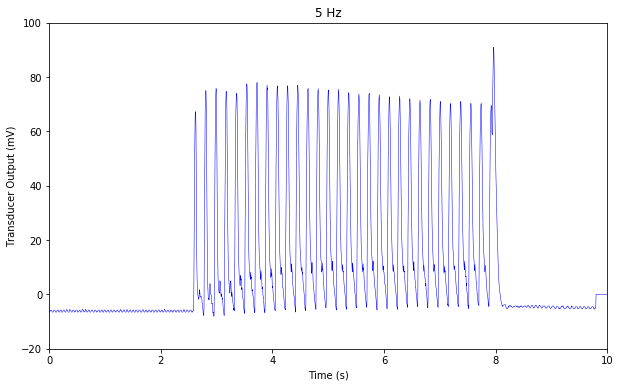

In [33]:
pltSummation(summation[summation['Page'] == 3], **kwargs, save = True)

In [34]:
kwargs = {'xmax': 7, 'ymax': 100, 'title': '10 Hz', 'file_name': 'skeletal10Hz.jpg'}

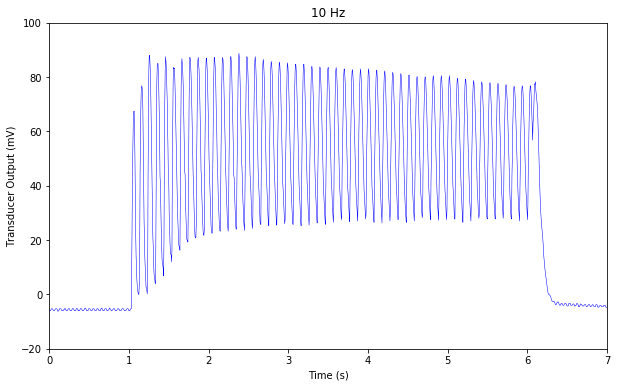

In [35]:
pltSummation(summation[summation['Page'] == 4], **kwargs, save = True)

In [36]:
kwargs = {'xmax': 7, 'ymax': 120, 'title': '40 Hz', 'file_name': 'skeletal40Hz.jpg'}

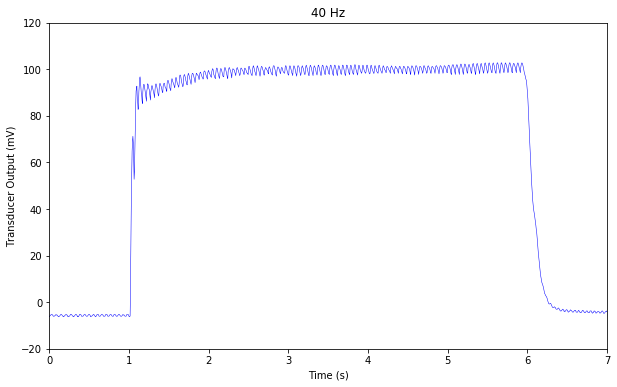

In [37]:
pltSummation(summation[summation['Page'] == 5], **kwargs, save = True)

In [38]:
kwargs = {'xmax': 8, 'ymax': 160, 'title': '60 Hz', 'file_name': 'skeletal60Hz.jpg'}

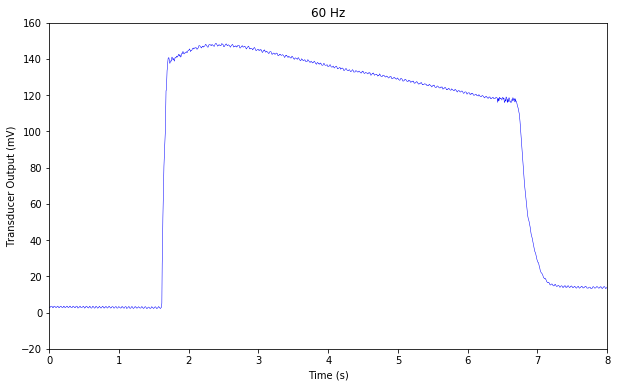

In [39]:
pltSummation(summation[summation['Page'] == 6], **kwargs, save = True)

In [40]:
kwargs = {'xmax': 50, 'ymax': 140, 'title': 'Fatigue', 'file_name': 'skeletalFatigue.jpg'}

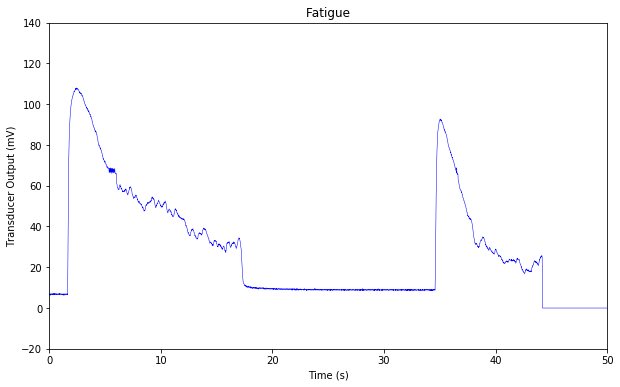

In [41]:
pltSummation(summation[summation['Page'] == 8], **kwargs, save = True)

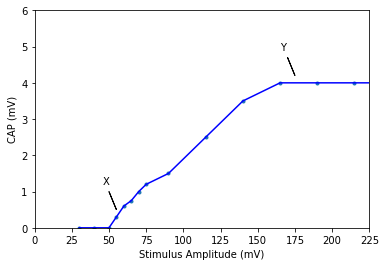

In [42]:
data = {'CAP (mV)': [0, 0, 0, 0.3, 0.6, 0.75, 1, 1.2, 1.5, 2.5, 3.5, 4.0, 4.0, 4.0, 4.0],
       'Stimulus Potential (mV)': [30, 40, 50, 55, 60, 65, 70, 75, 90, 90+25, 90+50, 90+75, 90+100, 90+125, 230]}

points = pd.DataFrame(data)

plt.plot(figsize=(10,6))
plt.plot(points['Stimulus Potential (mV)'], points['CAP (mV)'], '.', points['Stimulus Potential (mV)'], points['CAP (mV)'], 'b-')
plt.xlim(xmin=0, xmax=225)
plt.ylim(ymin=0, ymax=6)
plt.xlabel('Stimulus Amplitude (mV)')
plt.ylabel('CAP (mV)')
plt.arrow(55, 0.5, -5, 0.5)
plt.text(46, 1.2, 'X')
plt.arrow(175, 4.2, -5, 0.5)
plt.text(165, 4.9, 'Y')
plt.savefig('Downloads/thresholdHomework.jpg', dpi = 500)

In [43]:
np.arange(0.)

array([], dtype=float64)

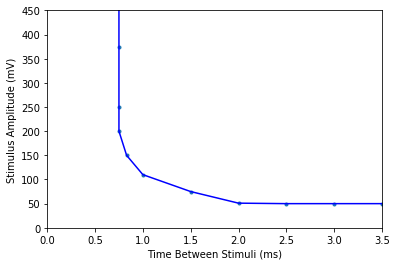

In [44]:
data = {'Time (ms)': [0.75, 0.75, 0.75, 0.75, 0.83, 1, 1.5, 2, 2.5, 3, 3.5], 
        'Stimulus Amplitude (mV)': [475, 375, 250, 200, 150, 110, 75, 51, 50, 50, 50]}
points = pd.DataFrame(data)
plt.plot(figsize=(10,6))
plt.plot(points['Time (ms)'], points['Stimulus Amplitude (mV)'], '.', points['Time (ms)'], points['Stimulus Amplitude (mV)'], 'b-')
plt.xlim(xmin=0, xmax=3.5)
plt.ylim(ymin=0, ymax=450)
plt.xlabel('Time Between Stimuli (ms)')
plt.ylabel('Stimulus Amplitude (mV)')
plt.savefig('Downloads/strengthDurationhw.jpg', dpi=500)
